In [1]:
inputfile="../../tmp/all.results.tsv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from scipy.cluster.hierarchy import fcluster

In [3]:
df=pd.read_csv(inputfile,sep="\t")

In [69]:
list(df[df.index=="ENSG00000008311"].values[0])

[26399.321314380697,
 27126.171935525297,
 27308.991349775697,
 4104.7880666875,
 3980.01555642541,
 3601.0835139464702,
 3386.08925743564,
 3364.7649875861102,
 3473.51216872198,
 4029.9461753835203,
 3356.6084208492603,
 3431.64807271659,
 3348.3056199998305,
 3392.77213901826,
 3342.22900483877,
 3037.21869719785,
 2920.4118556690505,
 2591.62190239077,
 1443.6152015321697,
 1372.15285906637,
 1427.09234634582]

In [5]:
def extract_rows_colors(heatmap, method='average', k=30): #2
    g = sns.clustermap(heatmap,method=method,cmap="YlOrRd",figsize=(10,15))
    #plt.show()
    reordered_index=g.dendrogram_row.reordered_ind
    #print(len(reordered_index))
    #reordered_cols=g.dendrogram_col.reordered_ind
    index_linkage=g.dendrogram_row.linkage
    #cols_linkage=g.dendrogram_col.linkage
    
    clusters = fcluster(index_linkage, k, criterion='maxclust')
    original_order=pd.DataFrame({"col":heatmap.index.tolist(),"cluster":clusters})
    
    cols_cluster=original_order["cluster"].tolist()
    cols_cluster_=list(set(cols_cluster))
    cols_cluster_dic={}
    for c in cols_cluster_:
        cols_cluster_dic[c]=np.random.rand(3,)
    cols_cluster=[ cols_cluster_dic[s] for s in cols_cluster ]
    plt.close()
    return cols_cluster, original_order

def extract_cols_colors(heatmap, method='average', k=7):#35
    
    g = sns.clustermap(heatmap,method=method)
    #plt.show()
    reordered_cols=g.dendrogram_col.reordered_ind
    cols_linkage=g.dendrogram_col.linkage
    
    clusters = fcluster(cols_linkage, k, criterion='maxclust')
    original_order=pd.DataFrame({"col":heatmap.columns.tolist(),"cluster":clusters})
    
    cols_cluster=original_order["cluster"].tolist()
    cols_cluster_=list(set(cols_cluster))
    cols_cluster_dic={}
    for c in cols_cluster_:
        cols_cluster_dic[c]=np.random.rand(3,)
    cols_cluster=[ cols_cluster_dic[s] for s in cols_cluster ]
    plt.close()
    return cols_cluster, original_order

In [6]:
df.head()

,S_001-F_LeTo-L____wt-__0-____-REP_1,S_002-F_LeTo-L____wt-__0-____-REP_2,S_003-F_LeTo-L____wt-__0-____-REP_3,S_004-F_LeTo-L____wt-__1-____-REP_1,S_005-F_LeTo-L____wt-__1-____-REP_2,S_006-F_LeTo-L____wt-__1-____-REP_3,S_007-F_LeTo-L____wt-__2-____-REP_1,S_008-F_LeTo-L____wt-__2-____-REP_2,S_009-F_LeTo-L____wt-__2-____-REP_3,S_010-F_LeTo-L____wt-__4-____-REP_1,...,S_012-F_LeTo-L____wt-__4-____-REP_3,S_013-F_LeTo-L____wt-__6-____-REP_1,S_014-F_LeTo-L____wt-__6-____-REP_2,S_015-F_LeTo-L____wt-__6-____-REP_3,S_016-F_LeTo-L____wt-__8-____-REP_1,S_017-F_LeTo-L____wt-__8-____-REP_2,S_018-F_LeTo-L____wt-__8-____-REP_3,S_019-F_LeTo-L____wt-_14-____-REP_1,S_020-F_LeTo-L____wt-_14-____-REP_2,S_021-F_LeTo-L____wt-_14-____-REP_3
ENSG00000008311,26399.321314,27126.171936,27308.991350,4104.788067,3980.015556,3601.083514,3386.089257,3364.764988,3473.512169,4029.946175,...,3431.648073,3348.305620,3392.772139,3342.229005,3037.218697,2920.411856,2591.621902,1443.615202,1372.152859,1427.092346
ENSG00000111186,84.279063,113.059772,84.917380,4284.315237,4034.383162,3942.171046,1726.619880,1570.828191,1554.166545,370.201779,...,314.766757,622.104320,509.361414,475.264063,968.485552,990.811503,978.487851,816.166315,721.714486,809.619660
ENSG00000116729,118.940564,138.447800,100.377046,4287.092025,4206.690532,4187.556206,5130.639108,5269.775512,5144.644725,6702.278490,...,6391.721147,6854.142214,7504.769014,6565.090652,5704.210496,5809.740510,5480.671513,4511.559741,3559.513969,4802.022970
ENSG00000164458,18.839171,26.014704,27.970410,4570.204544,5236.141629,4748.933976,8481.739112,9153.499775,9708.429072,19.595619,...,9.991389,11.727800,4.153740,4.966222,0.000000,1.577865,3.692661,0.000000,0.000000,0.000000
ENSG00000166073,12006.317571,12348.721738,12304.585374,693.580228,713.592762,705.662400,1290.474762,1333.710309,1405.790452,657.474050,...,629.527096,330.784540,350.161421,298.235210,152.795534,175.825374,165.147646,369.358111,295.127022,334.275718


In [21]:
df=df[:100]
#df = df.mask(df < 20)
mask = df.isnull()

cluster_index, index_cluster_numbers = extract_rows_colors(heatmap=df, method='average', k=30) # 2.5
cols_cluster, cols_cluster_numbers=extract_cols_colors(df,k=9) # 4

In [ ]:
STANDARD_COLORS=["blue","green","red","cyan","magenta","yellow","black","white"]
STANDARD_SIZES=[ str(i) for i in list(range(101)) ]

def figure_defaults():
    plot_arguments={
        "fig_width":"6.0",\
        "fig_height":"6.0",\
        "title":'Scatter plot',\
        "title_size":STANDARD_SIZES,\
        "title_size_value":"10",\
        "xticklabels":['auto','False'],\
        "xtickslabels_value":'auto',\
        "yticklabels":['auto','False'],\
        "yticklabels_value":'auto',\
        "method":['single','complete','average', 'weighted','centroid','median','ward'],\
        "method_value":"ward",\
        "distance":["euclidean","minkowski","cityblock","seuclidean","sqeuclidean",\
                   "cosine","correlation","hamming","jaccard","chebyshev","canberra",\
                   "braycurtis","mahalanobis","yule","matching","dice","kulsinski","rogerstanimoto",\
                   "russellrao","sokalmichener","sokalsneath","wminkowski"],\
        "distance_value":"euclidean",\
        "n_cols_cluster":"0",\
        "n_rows_cluster":"0",\
        "cmap":["viridis","plasma","inferno","magma","cividis","Greys","Purples",\
               "Blues","Greens","Oranges","Reds","YlOrBr","YlOrRd","OrRd","PuRd",\
               "RdPu","BuPu","GnBu","PuBu","YlGnBu","PuBuGn","BuGn","YlGn",\
               "binary","gist_yard","gist_gray","gray","bone","pink","spring",\
               "summer","autumn","winter","cool","Wistia","hot","afmhot","gist_heat",\
               "copper","PiYg","PRGn","BrBG","PuOr","RdGy","RdBu","RdYlBu","Spectral",\
               "coolwarm","bwr","seismic","Pastel1","Pastel2","Paired","Accent","Dark2",\
               "Set1","Set2","Set3","tab10","tab20","tab20b","tab20c","flag","prism","ocean",\
               "gist_earth", "gnuplot","gnuplot2","CMRmap","cubehelix","brg","hsv",\
               "gist_rainbow","rainbow","jet","nipy_spectral","gist_ncar"],\
        "cmap_value":"YlOrRd",\
        "vmin":"",\
        "vmax":"",\
        "linewidths":"0",\
        "linecolor":STANDARD_COLORS,\
        "linecolor_value":"white",\
        "color_bar_label":"",\
        "center":"",\
        "row_cluster":["True","False"],\
        "row_cluster_value":"True",\
        "col_cluster":["True","False"],\
        "col_cluster_value":"True",\
        "robust":["True","False"],\
        "robust_value":"True",\
        "col_dendogram_ratio":"0.25",\
        "row_dendogram_ratio":"0.25",\
        "zscore":["none","row","columns"],\
        "zscore_value":"none",\
        "xaxis_font_size":"10",\
        "yaxis_font_size":"10"}
        
        
        
        
        
        
        

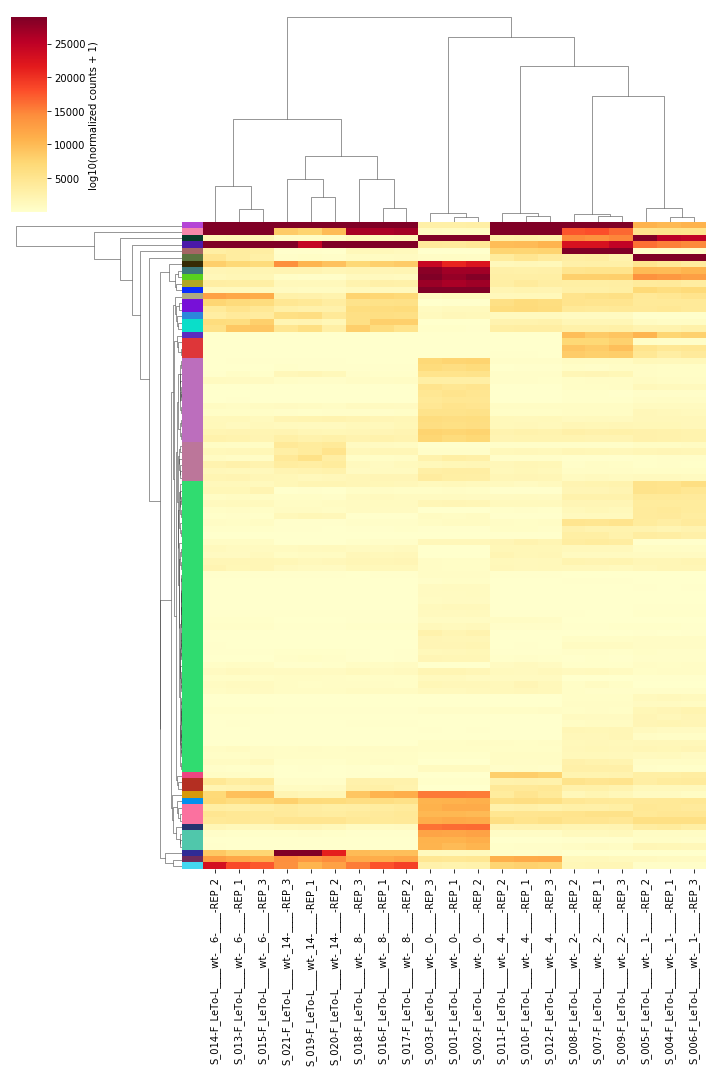

In [74]:
sns.axes_style("white")
g = sns.clustermap(df, xticklabels=1, yticklabels=False, linewidths=0, method='average', \
                   col_colors=None, row_colors=cluster_index,cmap="YlOrRd",\
                   vmin=None, vmax=None, linecolor='white',\
                   cbar_kws={'label': 'log10(normalized counts + 1)'},center=None, \
                   mask=mask, row_cluster=True, col_cluster=True,\
                   figsize=(10,15),robust=True, annot=None, dendrogram_ratio=(0.25,0.25),\
                   z_score=None)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 10)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 10)

plt.suptitle(None, fontsize=40)
#plt.tight_layout()
plt.show()
# center=0
# linewidths=.5
# xticklabels=2, yticklabels='auto',
# vmin, vmax
# robust
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [30]:
help(np.zeros_like)

Help on function zeros_like in module numpy:

zeros_like(a, dtype=None, order='K', subok=True, shape=None)
    Return an array of zeros with the same shape and type as a given array.
    
    Parameters
    ----------
    a : array_like
        The shape and data-type of `a` define these same attributes of
        the returned array.
    dtype : data-type, optional
        Overrides the data type of the result.
    
        .. versionadded:: 1.6.0
    order : {'C', 'F', 'A', or 'K'}, optional
        Overrides the memory layout of the result. 'C' means C-order,
        'F' means F-order, 'A' means 'F' if `a` is Fortran contiguous,
        'C' otherwise. 'K' means match the layout of `a` as closely
        as possible.
    
        .. versionadded:: 1.6.0
    subok : bool, optional.
        If True, then the newly created array will use the sub-class
        type of 'a', otherwise it will be a base-class array. Defaults
        to True.
    shape : int or sequence of ints, optional.
   